In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')
# import warnings
# def ignore_warn(*args,**kwargs):
#     pass
# warnings.warn=ignore_warn

from scipy import stats
from scipy.stats import norm,skew
pd.set_option('display.float_format',lambda x:"{:.3f}".format(x))

from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_ID=train["Id"]
test_ID=test["Id"]

train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

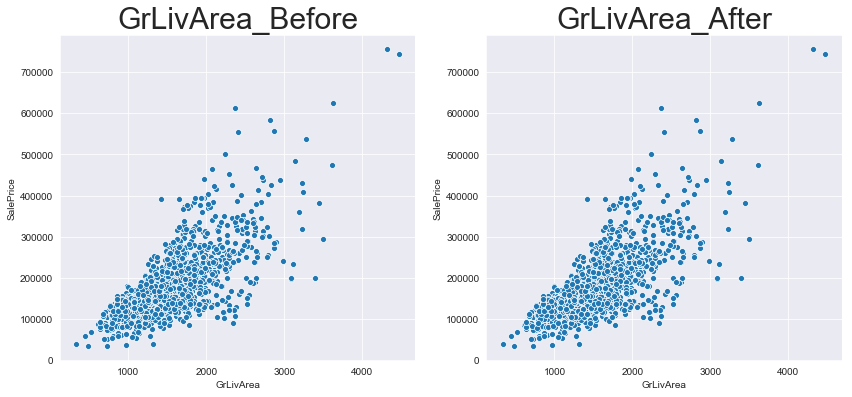

In [7]:
src="GrLivArea"
tar="SalePrice"
f,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].set_title(src+"_Before", fontsize=30)
sns.scatterplot(x=train[src],y=train[tar],ax=ax[0])
train=train.drop(train[(train[src]>4000) & (train[tar]<300000)].index)
ax[1].set_title(src+"_After", fontsize=30)
sns.scatterplot(x=train[src],y=train[tar],ax=ax[1])


 Mu = 180932.92 , sigma = 79467.79


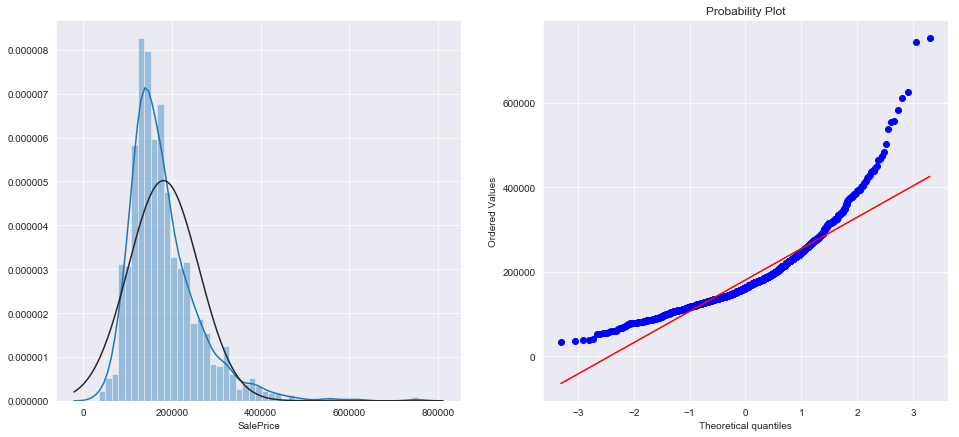

In [8]:
tar="SalePrice"
(mu,sigma)=norm.fit(train[tar])
print("\n Mu = {:.2f} , sigma = {:.2f}".format(mu,sigma))

f,ax=plt.subplots(1,2,figsize=(16,7))
sns.distplot(train[tar],fit=norm, ax=ax[0])
res=stats.probplot(train[tar],plot=ax[1])


 Mu = 12.02 , sigma = 0.40


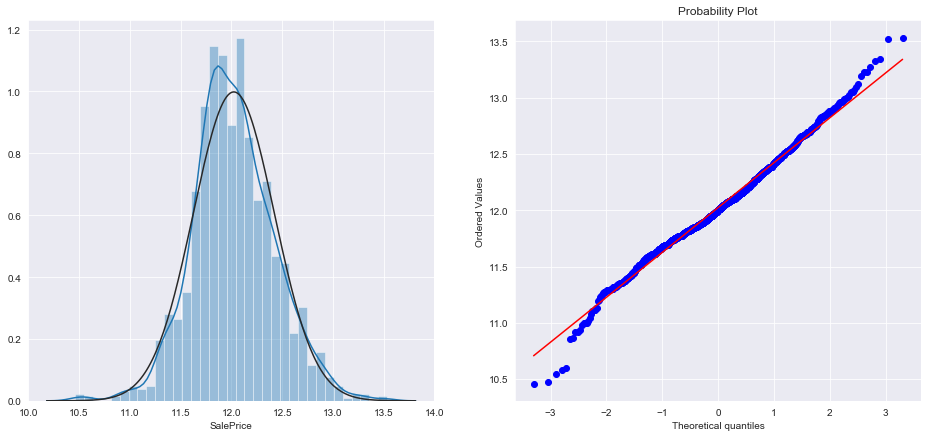

In [9]:
tar="SalePrice"
train[tar]=np.log1p(train[tar])

(mu,sigma)=norm.fit(train[tar])
print("\n Mu = {:.2f} , sigma = {:.2f}".format(mu,sigma))

f,ax=plt.subplots(1,2,figsize=(16,7))
sns.distplot(train[tar],fit=norm, ax=ax[0])
res=stats.probplot(train[tar],plot=ax[1])

In [10]:
print(train.shape)
print(test.shape)
train.head()

(1458, 80)
(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.248
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429


In [11]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
#Feature engineering
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.SalePrice.values
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop(["SalePrice"],axis=1,inplace=True)
print("all_data size is :{}".format(all_data.shape))


all_data size is :(2917, 79)


c:\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [13]:
#Missing Data
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:40]
missing_data=pd.DataFrame({"Missing Ratio":all_data_na})
missing_data.head(1000)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


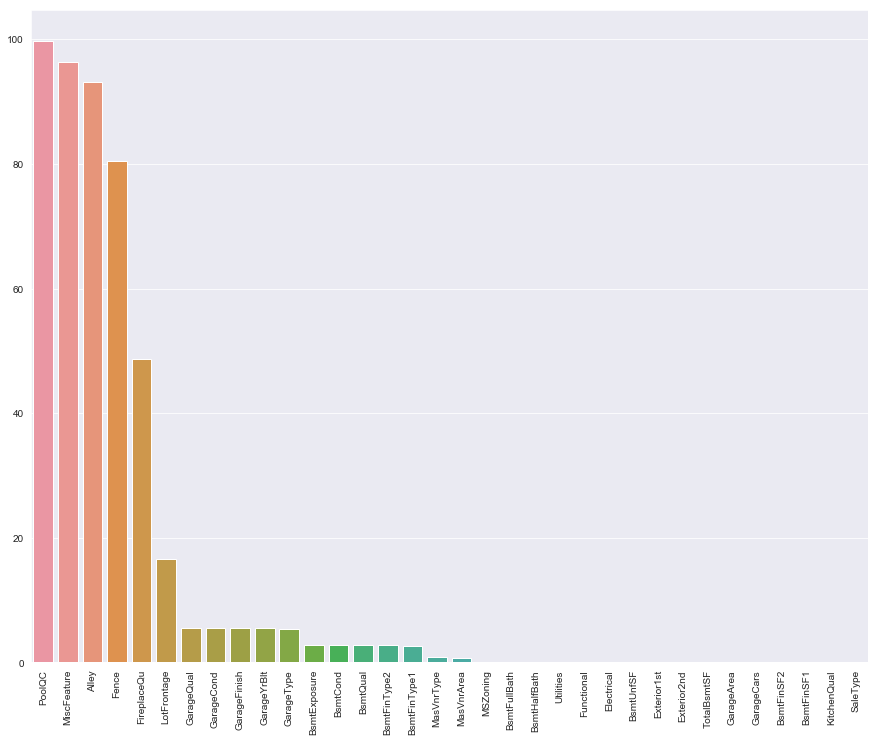

In [14]:
f,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index,y=all_data_na)

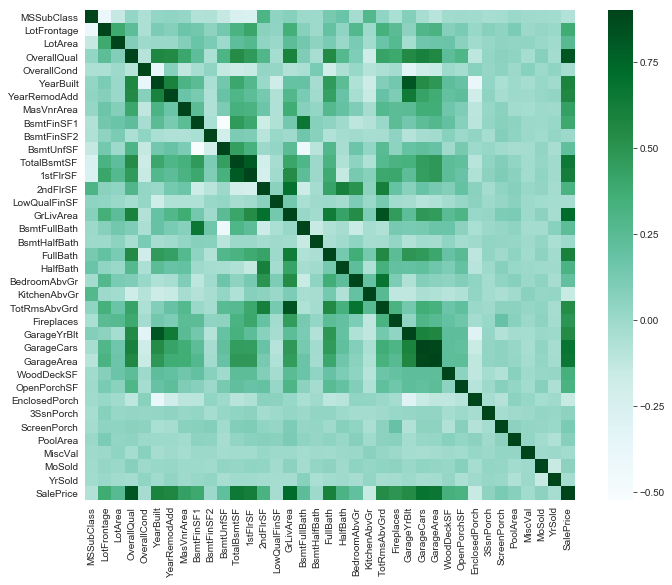

In [15]:
cmap=plt.cm.BuGn
corrmat=train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9,square=True,cmap=cmap)

## Imputing missing values

In [16]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data = all_data.drop(['Utilities'], axis=1)

all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [17]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


## Transforming some numerical variables that are really categorical

In [18]:
def myCategory(tar):
    f,ax=plt.subplots(1,2,figsize=(16,7))
    sns.distplot(all_data[tar],kde=True,rug=True,ax=ax[0])

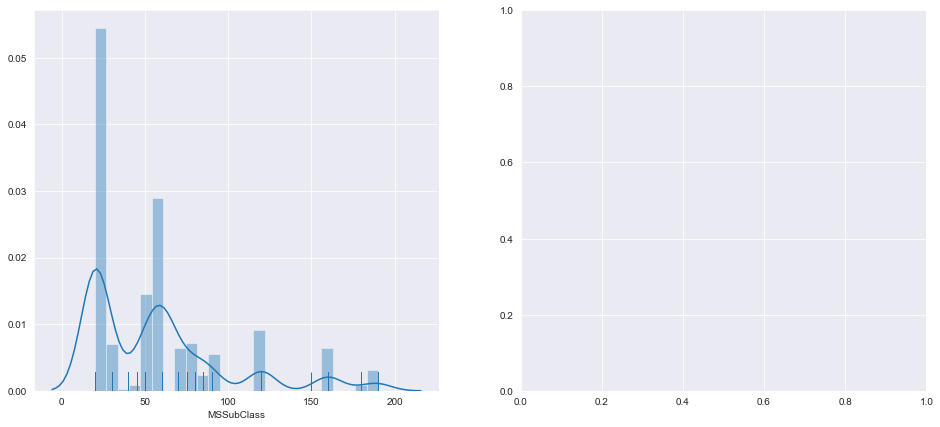

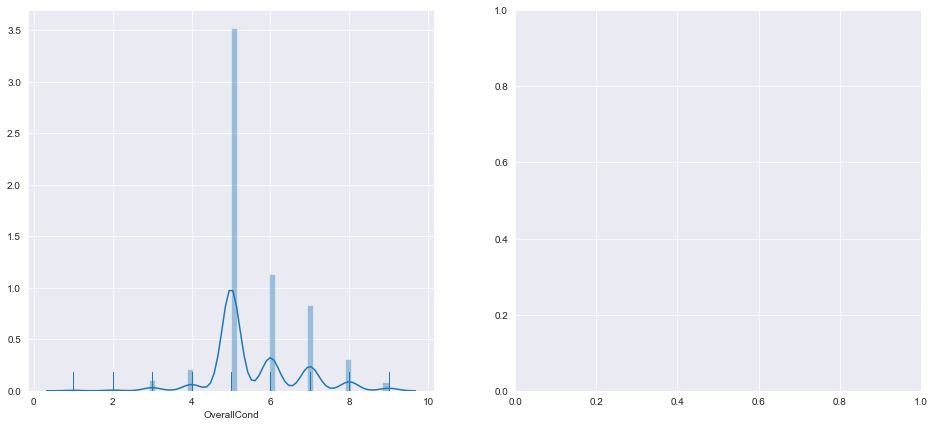

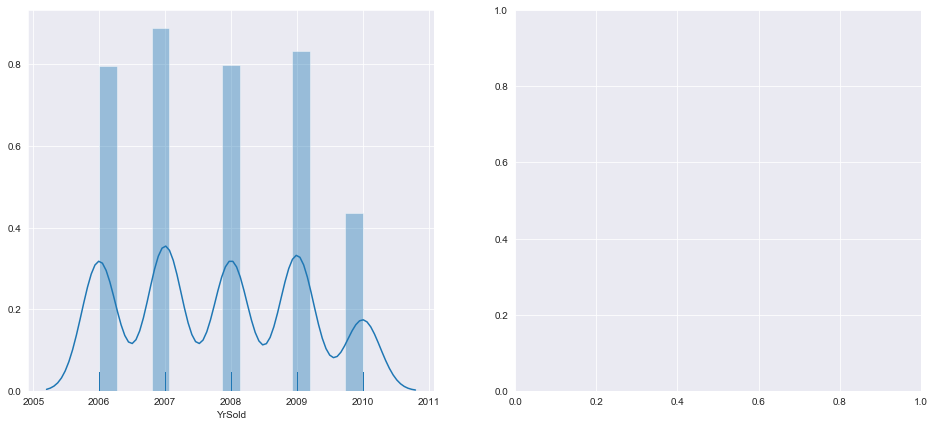

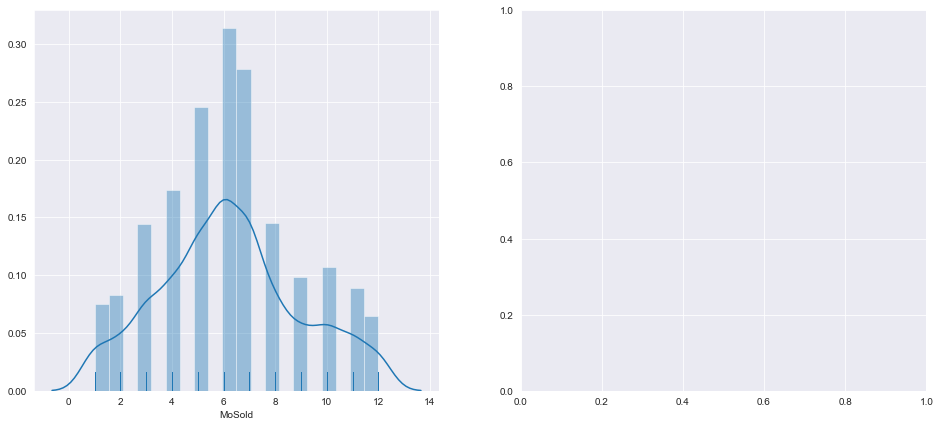

In [19]:
myCategory("MSSubClass")
myCategory("OverallCond")
myCategory("YrSold")
myCategory("MoSold")


In [20]:
# numerical variables to categorical
all_data["MSSubClass"]=all_data["MSSubClass"].astype(str)
all_data["OverallCond"]=all_data["OverallCond"].astype(str)
all_data["YrSold"]=all_data["YrSold"].astype(str)
all_data["MoSold"]=all_data["MoSold"].astype(str)

In [22]:
#Label Encoding some categorical variables that may contain information in their ordering set
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl=LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c]=lbl.transform(list(all_data[c].values))

In [27]:
all_data.shape

(2917, 79)

In [26]:
all_data["TotalSF"]=all_data["TotalBsmtSF"]+all_data["1stFlrSF"]+all_data["2ndFlrSF"]

## Skewed Features

In [28]:
numeric_feats=all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats=all_data[numeric_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness=pd.DataFrame({"Skew":skewed_feats})

skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [29]:
skewness=skewness[abs(skewness)>0.75]
print("Threre are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features=skewness.index
lam=0.15

for feat in skewed_features:
    all_data[feat]=boxcox1p(all_data[feat],lam)

Threre are 59 skewed numerical features to box cox transform


In [41]:
all_data.dtypes[all_data.dtypes != "object"].index

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       ...
       'SaleCondition_Partial', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=220)

## Getting dummy categorical features

In [31]:
all_data=pd.get_dummies(all_data)

In [44]:
#all_data.shape
all_data.shape

(2917, 220)

In [45]:
train=all_data[:ntrain]
test=all_data[ntrain:]

## Modeling

In [46]:
from sklearn.linear_model import ElasticNet,Lasso,BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [64]:
#Define a cross validation strategy
n_folds=5
def rmsle_cv(model):
    kf=KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse=np.sqrt(-cross_val_score(model,train.values,y_train,scoring="neg_mean_squared_error",cv=kf))
    return (rmse)

In [49]:
#base model
#lasso regression
lasso=make_pipeline(RobustScaler(), Lasso(alpha=0.0005,random_state=1))

In [50]:
#Elastic Net Regression
ENet=make_pipeline(RobustScaler(), ElasticNet(alpha=0.005, l1_ratio=.9,random_state=3))

In [54]:
#Kernel Ridge Regression
KRR=KernelRidge(alpha=0.6,kernel="polynomial",degree=2,coef0=2.5)

In [55]:
#Gradient Boosting Regression
GBoost=GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=4,max_features="sqrt",min_samples_leaf=15,min_samples_split=10,loss="huber",random_state=5)

In [56]:
#XGBoost
model_xgb=xgb.XGBRegressor(colsample_bytree=0.4603,gamma=0.046,learning_rate=0.4,max_depth=3,min_child_weight=1.7,n_estimators=2200,
                          reg_alpha=0.4,reg_lambda=0.8,subsample=0.5,silent=1,random_state=7,nthread=-1)

In [59]:
#LightGBM
model_lgb=lgb.LGBMRegressor(objective="regression",num_leaves=5,learning_rate=0.04,n_estimators=820,
                           max_bin=55,bagging_fraction=0.8, bagging_freq=5,feature_fraction=0.2,
                           feature_fraction_seed=9,bagging_seed=9,min_data_in_leaf=6,min_sum_hessian_in_leaf=11)

In [66]:
score=rmsle_cv(lasso)
print("\nLasso score:{:.4f} ({:.4f})\n".format(score.mean(),score.std()))


Lasso score:0.1115 (0.0074)



In [68]:
score=rmsle_cv(ENet)
print("\nENet score:{:.4f} ({:.4f})\n".format(score.mean(),score.std()))


ENet score:0.1240 (0.0076)



In [69]:
score=rmsle_cv(KRR)
print("\nKernel Ridge score:{:.4f} ({:.4f})\n".format(score.mean(),score.std()))


Kernel Ridge score:0.1153 (0.0075)



In [71]:
score=rmsle_cv(GBoost)
print("\nGradient Boosting score:{:.4f} ({:.4f})\n".format(score.mean(),score.std()))


Gradient Boosting score:0.1177 (0.0080)



In [72]:
score=rmsle_cv(model_xgb)
print("\nXgboost score:{:.4f} ({:.4f})\n".format(score.mean(),score.std()))


Xgboost score:0.1319 (0.0092)



In [73]:
score=rmsle_cv(model_lgb)
print("\nLGBM score:{:.4f} ({:.4f})\n".format(score.mean(),score.std()))


LGBM score:0.1156 (0.0057)



In [ ]:
#Averaged base models class
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    